In [85]:
import pandas as pd
import numpy as np

In [75]:
df=pd.read_csv("fremont_bridge.csv",index_col= 'Date',  parse_dates=True)

C:\Users\Shrut\AppData\Local\Temp\ipykernel_9064\3110477551.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv("fremont_bridge.csv",index_col= 'Date',  parse_dates=True)


In [77]:
df.columns=['Total','West','East']
df.head()

,Total,West,East
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [13]:
df.shape

(102947, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102947 entries, 2012-10-02 13:00:00 to 2024-06-30 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Total   102919 non-null  float64
 1   West    102919 non-null  float64
 2   East    102919 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


In [19]:
df.isnull().sum()

Total    28
West     28
East     28
dtype: int64

In [20]:
df.describe()

,Total,West,East
count,102919.000000,102919.000000,102919.000000
mean,105.726678,45.540386,60.186292
std,131.828673,59.811079,81.791663
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,59.000000,26.000000,32.000000
75%,144.000000,62.000000,79.000000
max,1097.000000,667.000000,850.000000


In [50]:
df=df.dropna()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
west_counts = df['West'].value_counts()
east_counts = df['East'].value_counts()

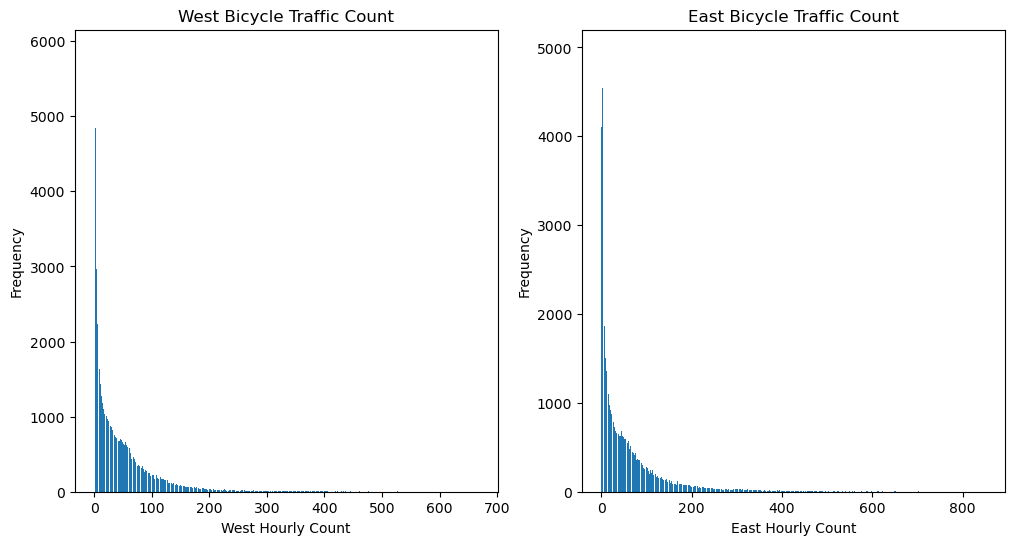

In [52]:
fig, [axs1,axs2] = plt.subplots(1, 2,figsize=(12,6))

axs1.bar(x=west_counts.index,height=west_counts.values)
axs1.set_title('West Bicycle Traffic Count')
axs1.set_xlabel('West Hourly Count')
axs1.set_ylabel('Frequency')

axs2.bar(x=east_counts.index,height=east_counts.values)
axs2.set_title('East Bicycle Traffic Count')
axs2.set_xlabel('East Hourly Count')
axs2.set_ylabel('Frequency')

plt.show()

Observation:
It can be seen from the above charts that both the West bicycle hourly count and East bicycle hourly count are right skewed i.e. a significant hourly count of bicycles passing through both west and east side of bridge is less than 100.

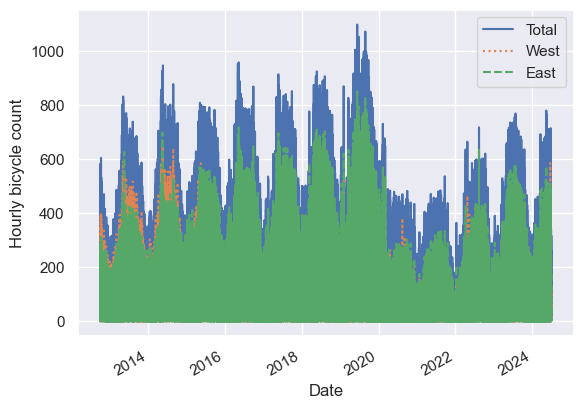

In [57]:
sns.set_theme()
df.plot(style=['-',':', '--',])
plt.ylabel('Hourly bicycle count')
plt.show()

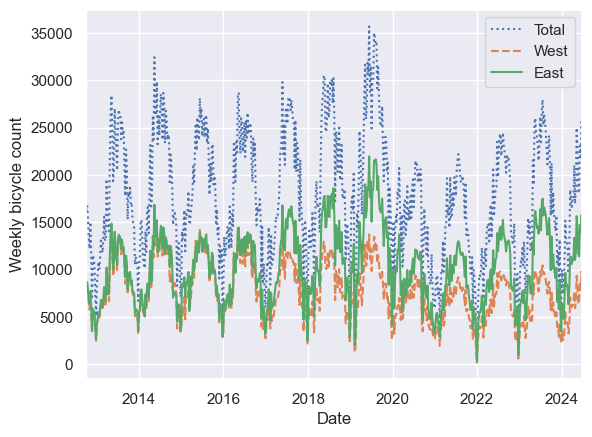

In [56]:
weekly = df.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

Observation:
Each year during summer the bicycle usage have spiked

In [79]:
daily=df.resample('D').sum()
daily.head()

,Total,West,East
Date,,,
2012-10-02,1938.0,1165.0,773.0
2012-10-03,3521.0,1761.0,1760.0
2012-10-04,3475.0,1767.0,1708.0
2012-10-05,3148.0,1590.0,1558.0
2012-10-06,2006.0,926.0,1080.0


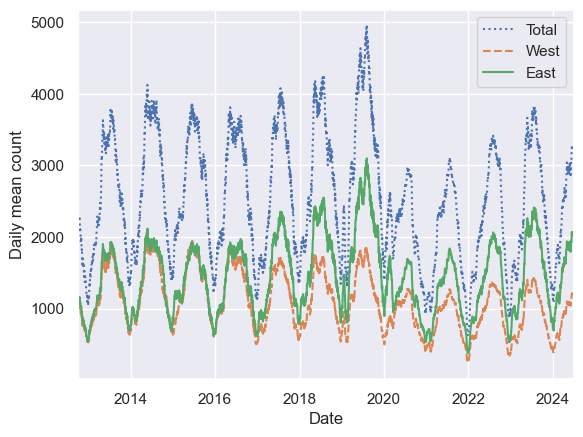

In [84]:
daily_rolling_mean=daily.rolling(30, center=True).mean()
daily_rolling_mean.plot(style=[':', '--', '-'])
plt.ylabel('Daily mean count')
plt.show()

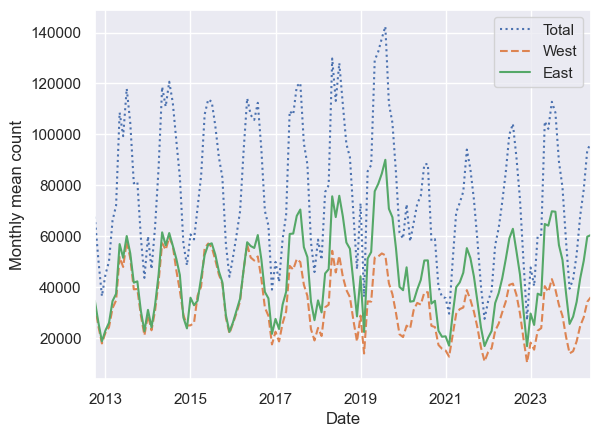

In [97]:
monthly=df.resample('M').sum()
monthly.plot(style=[':', '--', '-'])
plt.ylabel('Monthly mean count')
plt.show()

Average Bicycle Traffic w.r.t. time of the day over given years of data

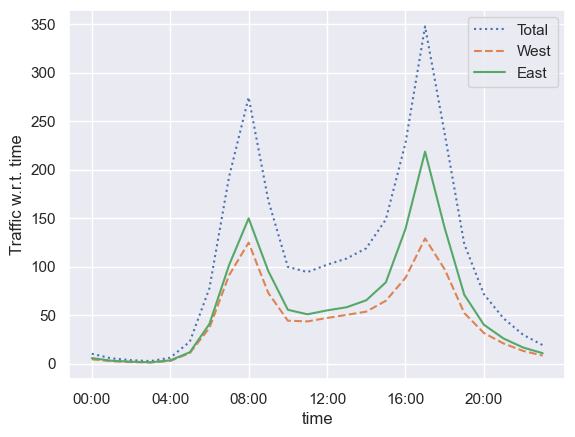

In [95]:
df_by_time = df.groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
df_by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic w.r.t. time")
plt.show()

Bicycle's peak usage hours are 8 am and 5 pm.

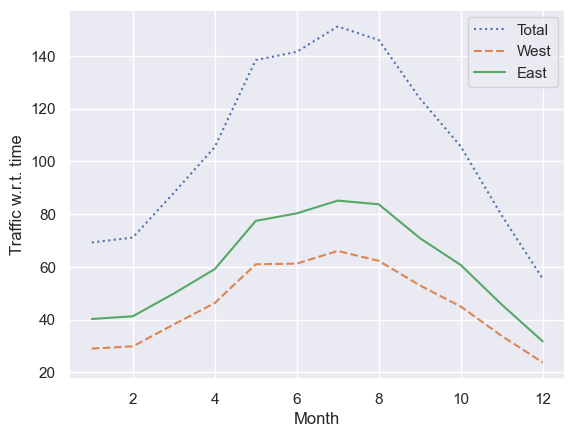

In [108]:
df_by_month=df.groupby(df.index.month).mean()
df_by_month.plot(style=[':', '--', '-'])
plt.xlabel('Month')
plt.ylabel('Traffic w.r.t. time')
plt.show()